In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# Charger les données
collision_data_files = glob.glob('collision_data_*.csv')
alert_data_files = glob.glob('collision_alert_*.csv')

collision_data = pd.concat([pd.read_csv(f) for f in collision_data_files])
alert_data = pd.concat([pd.read_csv(f) for f in alert_data_files])

print(collision_data.head())
print(alert_data.head())

    Time VehicleID   Speed  PositionX  PositionY  DetectedObjects  TTC  \
0  0.286      vehA  12.066   2787.211   7544.168                0  NaN   
1  0.386      vehA  12.150   2787.697   7543.054                0  NaN   
2  0.486      vehA  12.206   2788.185   7541.935                0  NaN   
3  0.586      vehA  12.261   2788.675   7540.811                0  NaN   
4  0.686      vehA  12.359   2789.169   7539.678                0  NaN   

   SubCauseCode DangerVehicleID  
0             0             NaN  
1             0             NaN  
2             0             NaN  
3             0             NaN  
4             0             NaN  
    Time VehicleID  Speed AlertReceived AlertType SenderID    TTC  Distance  \
0  1.586      vehB  12.00           Yes   Warning     vehA  1.517    17.565   
1  1.706      vehB  11.10           Yes   Warning     vehA  1.842    16.616   
2  1.786      vehB  11.10           Yes   Warning     vehA  2.217    17.937   
3  1.906      vehB  10.20          

In [2]:
# Convertir la colonne Time en datetime
# Trier les données par temps
collision_data = collision_data.sort_values('Time')
alert_data = alert_data.sort_values('Time')

# Créer une colonne pour indiquer si un DENM a été envoyé
collision_data['DENM_Sent'] = collision_data['SubCauseCode'].apply(lambda x: 'Yes' if x > 0 else 'No')

print(collision_data.info())
print(alert_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             466 non-null    float64
 1   VehicleID        466 non-null    object 
 2   Speed            466 non-null    float64
 3   PositionX        466 non-null    float64
 4   PositionY        466 non-null    float64
 5   DetectedObjects  466 non-null    int64  
 6   TTC              69 non-null     float64
 7   SubCauseCode     466 non-null    int64  
 8   DangerVehicleID  69 non-null     object 
 9   DENM_Sent        466 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 36.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 2321 entries, 0 to 1355
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           2321 non-null   float64
 1   VehicleID      2321 non-null   object

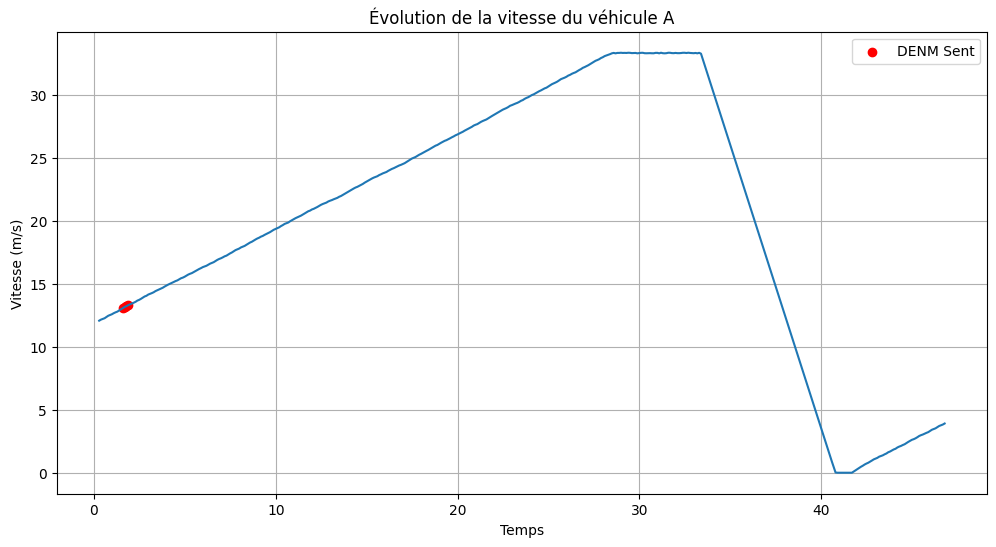

In [3]:
veh_A_data = collision_data[collision_data['VehicleID'] == 'vehA']

plt.figure(figsize=(12, 6))
plt.plot(veh_A_data['Time'], veh_A_data['Speed'])
plt.scatter(veh_A_data[veh_A_data['DENM_Sent'] == 'Yes']['Time'], 
            veh_A_data[veh_A_data['DENM_Sent'] == 'Yes']['Speed'], 
            color='red', label='DENM Sent')
plt.title("Évolution de la vitesse du véhicule A")
plt.xlabel("Temps")
plt.ylabel("Vitesse (m/s)")
plt.legend()
plt.grid(True)
plt.show()

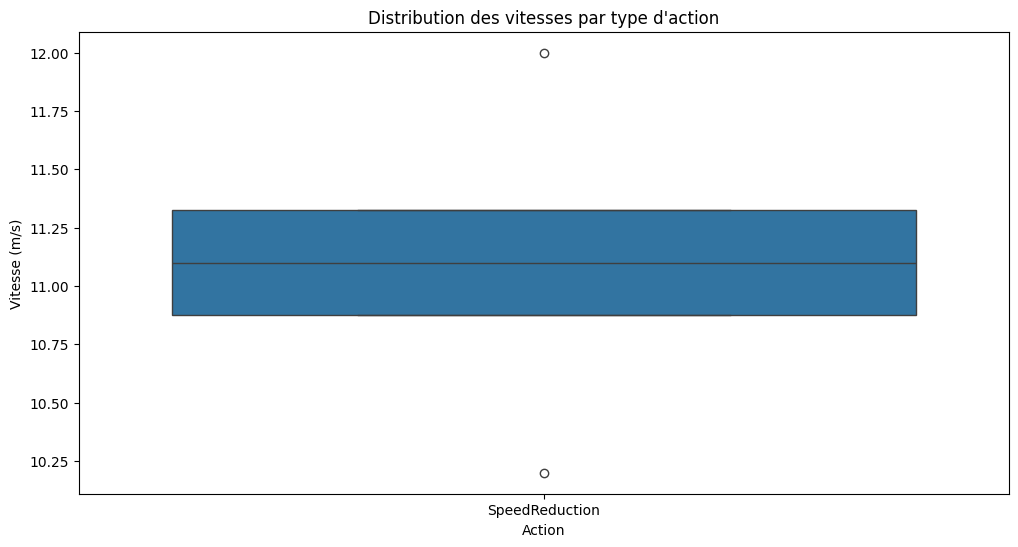

In [4]:
# Filtrer les données où une alerte a été reçue
alerts_received = alert_data[alert_data['AlertReceived'] == 'Yes']

plt.figure(figsize=(12, 6))
sns.boxplot(x='Action', y='Speed', data=alerts_received)
plt.title("Distribution des vitesses par type d'action")
plt.xlabel("Action")
plt.ylabel("Vitesse (m/s)")
plt.show()

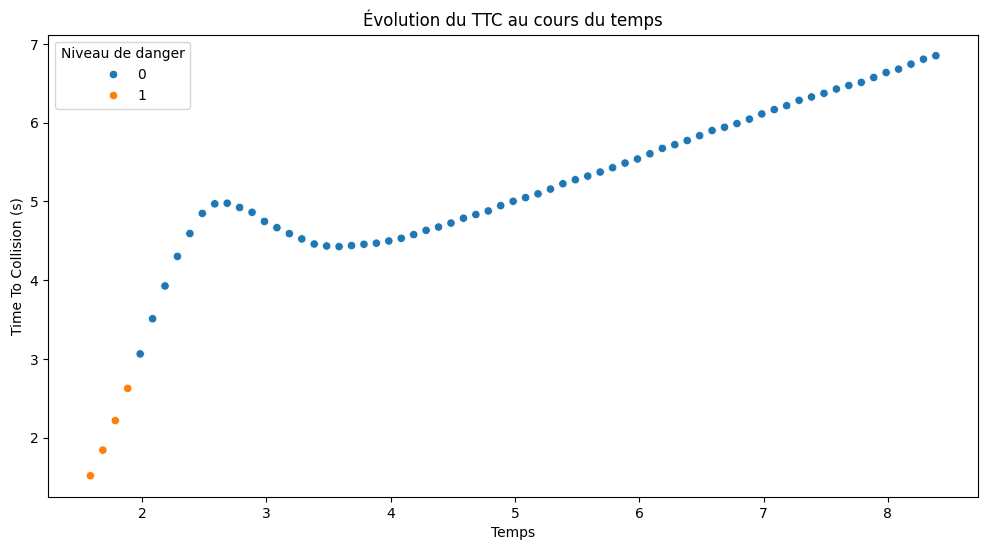

In [5]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=collision_data[collision_data['TTC'] != 'inf'], x='Time', y='TTC', hue='SubCauseCode')
plt.title("Évolution du TTC au cours du temps")
plt.xlabel("Temps")
plt.ylabel("Time To Collision (s)")
plt.legend(title="Niveau de danger")
plt.show()

/tmp/ipykernel_5773/3991280708.py:14: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  alerts_per_second = alert_data.groupby(alert_data['Time'].dt.floor('S'))['AlertReceivedNum'].sum()


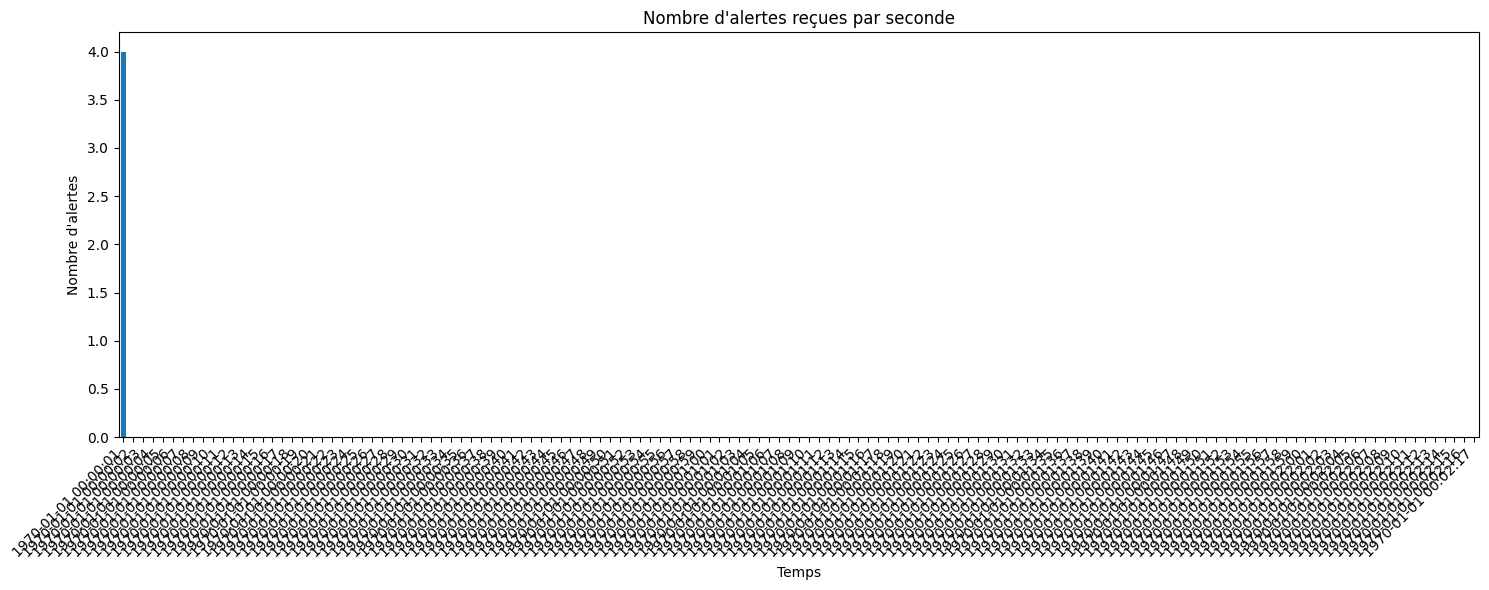

In [6]:
# Cellule 6 (modifiée) : Analyse de la fréquence des alertes par seconde

# Convertir 'AlertReceived' en valeurs numériques
alert_data['AlertReceivedNum'] = (alert_data['AlertReceived'] == 'Yes').astype(int)

# Convertir 'Time' en datetime si ce n'est pas déjà le cas
if not pd.api.types.is_datetime64_any_dtype(alert_data['Time']):
    alert_data['Time'] = pd.to_datetime(alert_data['Time'], unit='s')

# Trier les données par temps
alert_data = alert_data.sort_values('Time')

# Calculer le nombre d'alertes par seconde sans utiliser resample
alerts_per_second = alert_data.groupby(alert_data['Time'].dt.floor('S'))['AlertReceivedNum'].sum()

plt.figure(figsize=(15, 6))
alerts_per_second.plot(kind='bar')
plt.title("Nombre d'alertes reçues par seconde")
plt.xlabel("Temps")
plt.ylabel("Nombre d'alertes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

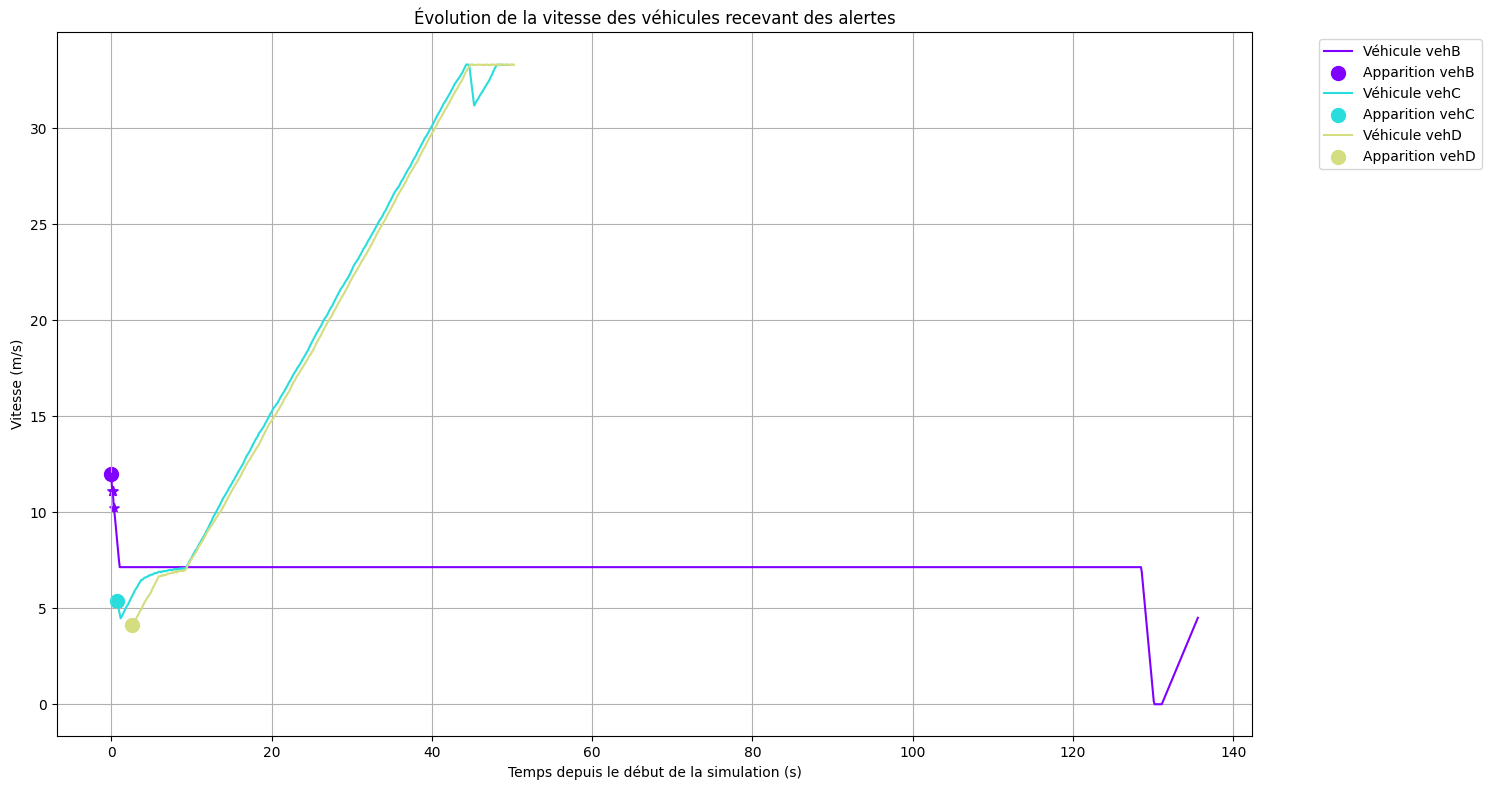

Véhicule vehB: Apparu à 0.00s, 4 alertes reçues
Véhicule vehC: Apparu à 0.77s, 0 alertes reçues
Véhicule vehD: Apparu à 2.64s, 0 alertes reçues


In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Assurez-vous que la colonne 'Time' est au format datetime
if not pd.api.types.is_datetime64_any_dtype(alert_data['Time']):
    alert_data['Time'] = pd.to_datetime(alert_data['Time'], unit='s')

# Trier les données par temps
alert_data = alert_data.sort_values('Time')

# Obtenir le temps de début global de la simulation
global_start_time = alert_data['Time'].min()

# Obtenir la liste des véhicules uniques qui reçoivent des alertes
vehicles = alert_data['VehicleID'].unique()

# Créer un graphique
plt.figure(figsize=(15, 8))

# Fonction pour obtenir une couleur unique pour chaque véhicule
def get_color(i, n):
    return plt.cm.rainbow(i / n)

for i, vehicle in enumerate(vehicles):
    vehicle_data = alert_data.loc[alert_data['VehicleID'] == vehicle].copy()
    
    # Calculer le temps relatif depuis le début de la simulation
    vehicle_data['RelativeTime'] = (vehicle_data['Time'] - global_start_time).dt.total_seconds()
    
    color = get_color(i, len(vehicles))
    
    # Tracer la courbe de vitesse
    plt.plot(vehicle_data['RelativeTime'], vehicle_data['Speed'], 
             label=f'Véhicule {vehicle}', color=color)
    
    # Marquer le point d'apparition du véhicule
    first_appearance = vehicle_data['RelativeTime'].min()
    plt.scatter(first_appearance, vehicle_data['Speed'].iloc[0], 
                color=color, s=100, marker='o', 
                label=f'Apparition {vehicle}')
    
    # Marquer les points où des alertes ont été reçues
    alerts_received = vehicle_data[vehicle_data['AlertReceived'] == 'Yes']
    plt.scatter(alerts_received['RelativeTime'], alerts_received['Speed'], 
                color=color, s=50, marker='*')

plt.title("Évolution de la vitesse des véhicules recevant des alertes")
plt.xlabel("Temps depuis le début de la simulation (s)")
plt.ylabel("Vitesse (m/s)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Afficher des statistiques sur les alertes reçues et les temps d'apparition
for vehicle in vehicles:
    vehicle_data = alert_data[alert_data['VehicleID'] == vehicle]
    alerts_count = vehicle_data['AlertReceived'].value_counts().get('Yes', 0)
    appearance_time = (vehicle_data['Time'].min() - global_start_time).total_seconds()
    print(f"Véhicule {vehicle}: Apparu à {appearance_time:.2f}s, {alerts_count} alertes reçues")